<a href="https://colab.research.google.com/github/RafiShiddik/Visualisasi-Data-in-Python/blob/main/Latihan_data_cleaning_data_Achmad_Rafi_Shiddik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

#Load Data

In [2]:
df_marketing = pd.read_csv('/content/marketing_campaign.csv', sep="\t") #sep = \t befungis untuk mengatur tab pada data set dikarenakan ketikan tidak dikasih tab data set tidak dapat dibaca dnegan sempurna
df_marketing.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


# ***Data Description***
🟢 Informasi Umum Pelanggan
ID (int64) - Identifikasi unik untuk setiap pelanggan.

Year_Birth (int64) - Tahun kelahiran pelanggan. Bisa digunakan untuk menghitung usia.

Education (object) - Tingkat pendidikan pelanggan (misalnya Graduate, PhD, Master).

Marital_Status (object) - Status pernikahan pelanggan (Single, Married, Divorced, etc.).

Income (float64) - Pendapatan tahunan pelanggan. Ada 24 nilai yang hilang (karena Non-Null Count = 2216, bukan 2240).

🟢 Informasi Keluarga

Kidhome (int64) - Jumlah anak kecil (balita) di rumah.

Teenhome (int64) - Jumlah remaja di rumah.

🟢 Informasi Keanggotaan & Interaksi

Dt_Customer (datetime64[ns]) - Tanggal pelanggan pertama kali menjadi anggota (bergabung dengan program).

Recency (int64) - Jumlah hari sejak pelanggan terakhir berinteraksi atau melakukan pembelian.

🟢 Pengeluaran dalam Berbagai Kategori Produk

MntWines (int64) - Total uang yang dihabiskan untuk produk Wine.

MntFruits (int64) - Total uang yang dihabiskan untuk buah-buahan.

MntMeatProducts (int64) - Total uang yang dihabiskan untuk daging.

MntFishProducts (int64) - Total uang yang dihabiskan untuk ikan dan seafood.

MntSweetProducts (int64) - Total uang yang dihabiskan untuk makanan manis.

MntGoldProds (int64) - Total uang yang dihabiskan untuk produk emas (jewelry, accessories).

🟢 Informasi Pembelian

NumDealsPurchases (int64) - Jumlah pembelian yang dilakukan dalam promosi diskon.

NumWebPurchases (int64) - Jumlah pembelian yang dilakukan melalui website.

NumCatalogPurchases (int64) - Jumlah pembelian melalui katalog.

NumStorePurchases (int64) - Jumlah pembelian langsung di toko.

NumWebVisitsMonth (int64) - Jumlah kunjungan ke situs web dalam sebulan terakhir.

🟢 Respons Terhadap Kampanye Pemasaran

AcceptedCmp1 - AcceptedCmp5 (int64) - Indikator (1=Ya, 0=Tidak) apakah

pelanggan menerima penawaran dalam lima kampanye pemasaran yang berbeda.

Response (int64) - Apakah pelanggan merespons kampanye terakhir (1=Ya, 0=Tidak).

🟢 Lain-lain

Complain (int64) - Apakah pelanggan pernah mengajukan keluhan (1=Ya, 0=Tidak).

Z_CostContact (int64) - Biaya tetap per kontak (mungkin untuk pemasaran, kemungkinan nilainya konstan).

Z_Revenue (int64) - Pendapatan tetap yang diperoleh per pelanggan.

In [3]:
df_marketing.shape  #melihat banyaknya column dan baris

(2240, 29)

In [4]:
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
#tipe data tidak sesuai makanya ubah ke datetime
df_marketing['Dt_Customer']= pd.to_datetime(df_marketing['Dt_Customer'], format = "%d-%m-%Y") #mengubah type data tanggal menjadi datetime
df_marketing['Dt_Customer']

,Dt_Customer
0,2012-09-04
1,2014-03-08
2,2013-08-21
3,2014-02-10
4,2014-01-19
...,...
2235,2013-06-13
2236,2014-06-10
2237,2014-01-25
2238,2014-01-24


In [6]:
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [7]:
df_marketing[['Income','Kidhome', 'Teenhome', 'MntWines', 'MntFruits',
    'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].describe()

,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,0.444196,0.506250,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875
std,25173.076661,0.538398,0.544538,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35303.000000,0.000000,0.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000
50%,51381.500000,0.000000,0.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000
75%,68522.000000,1.000000,1.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000
max,666666.000000,2.000000,2.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000


#**Duplicat pada data**

##For EDA

In [8]:
# Mengecek jumlah data duplikat
df_marketing.duplicated().sum()

0

In [9]:
df_marketing[df_marketing.duplicated(keep=False)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


pada diatas terlihat bahwa data ini tidak memiliki duplicat

In [10]:
len(df_marketing)

2240

##For mechine Learning

In [11]:
from sklearn.model_selection import train_test_split
train_marketing, test_marketing = train_test_split(df_marketing, test_size=0.2, random_state=42) #0,2 karena kita mau membagi 80 % dan 20 % sedangkan 42 itu sudah ketentuan

In [12]:
len(train_marketing), len(test_marketing)

(1792, 448)

###Drop duplicate pada masing-masing train dan test

In [13]:
train_marketing.duplicated().sum()

0

In [14]:
test_marketing.duplicated().sum()

0

data ini juga tidak ada duplicate

##Handling mising value

###FOR EDA

In [15]:
df_marketing.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
75,5846,1977,Graduation,Divorced,40246.0,1,0,2012-12-19,68,2,1,6,2,1,1,1,1,0,2,6,0,0,0,0,0,0,3,11,0
589,4179,1959,Graduation,Together,24221.0,0,0,2013-08-20,94,8,9,9,2,5,22,1,1,1,3,4,0,0,0,0,0,0,3,11,0
94,2230,1970,PhD,Married,23626.0,1,0,2014-05-24,84,27,2,14,0,0,0,3,3,1,3,5,0,0,0,0,0,0,3,11,0
1952,3434,1951,Graduation,Single,80872.0,0,0,2014-05-12,60,483,72,567,94,12,108,1,4,4,10,1,0,0,0,0,0,0,3,11,0
842,3312,1988,Graduation,Single,34176.0,1,0,2014-05-12,12,5,7,24,19,14,20,4,3,0,4,6,0,0,0,0,0,0,3,11,0


###Indentifikasi mising value

In [16]:
df_marketing.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


dari sini terlihat pada kolom Income terdapat mising value

In [17]:
df_marketing[df_marketing.isna().any(axis=1)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0


####Handling
menagatasi mising value pada kolom Income dengan cara mengisi nilai Nan dengan media dari data Income

In [18]:
median_rating = df_marketing['NumWebPurchases'].median()
median_rating

4.0

In [19]:
df_marketing['NumWebPurchases'] = df_marketing['NumWebPurchases'].fillna(median_rating)

In [20]:
df_marketing.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


###identifikasi dengan values count

In [21]:
df_marketing.columns = df_marketing.columns.str.strip()


In [23]:
df_marketing['Income'].value_counts()

,count
Income,
7500.0,12
35860.0,4
37760.0,3
83844.0,3
63841.0,3
...,...
40760.0,1
41452.0,1
6835.0,1


In [24]:
df_marketing['NumDealsPurchases'].value_counts()

,count
NumDealsPurchases,
1,970
2,497
3,297
4,189
5,94
6,61
0,46
7,40
8,14


In [38]:
df_marketing['Income'].head()

,Income
0,58138.0
1,46344.0
2,71613.0
3,26646.0
4,58293.0


In [25]:
df_marketing['Kidhome'].value_counts()

,count
Kidhome,
0,1293
1,899
2,48


In [26]:
df_marketing['Teenhome'].value_counts()

,count
Teenhome,
0,1158
1,1030
2,52


In [27]:
df_marketing['NumCatalogPurchases'].value_counts()

,count
NumCatalogPurchases,
0,586
1,497
2,276
3,184
4,182
5,140
6,128
7,79
8,55


In [28]:
df_marketing['NumWebPurchases'].value_counts()

,count
NumWebPurchases,
2,373
1,354
3,336
4,280
5,220
6,205
7,155
8,102
9,75


####Pengecekan Jumlah Mising Value

In [29]:
len(df_marketing[df_marketing['Income'] == 'NaN']) / len(df_marketing) * 100

0.0

In [30]:
len(df_marketing[df_marketing['NumWebPurchases'] == 'NaN']) / len(df_marketing) * 100

0.0

In [31]:
len(df_marketing[df_marketing['NumWebPurchases'] == 'NaN']) / len(df_marketing) * 100

0.0

In [33]:
df_marketing.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


dari diatas terlihat mising value pada Income sudah tidak ada

##Handling
Outliner

Text(0.5, 1.0, 'Boxplot of Customer Income')

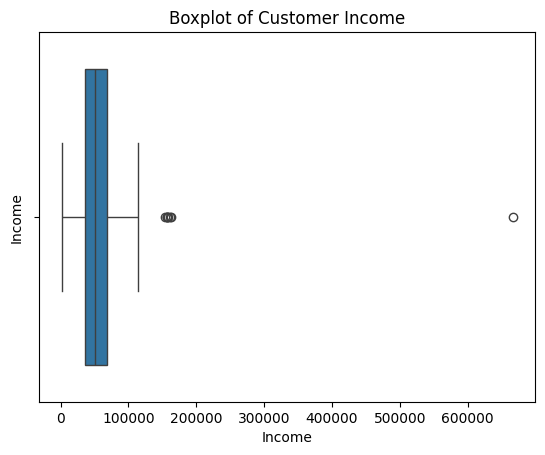

In [32]:
sns.boxplot(x= df_marketing['Income'])
plt.ylabel('Income')
plt.title('Boxplot of Customer Income')

In [39]:
q1 = df_marketing['Income'].quantile(0.25)
q3 = df_marketing['Income'].quantile(0.75)
iqr = q3 - q1
iqr

33219.0

In [40]:
#menghitung batas bawah dan batas atas
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
lower_bound, upper_bound

(-14525.5, 118350.5)

In [41]:
#mengambil pda rentang batas bawah dan batas atas
def_mareketing = df_marketing[(df_marketing['Income'] >= lower_bound) & (df_marketing['Income'] <= upper_bound)]

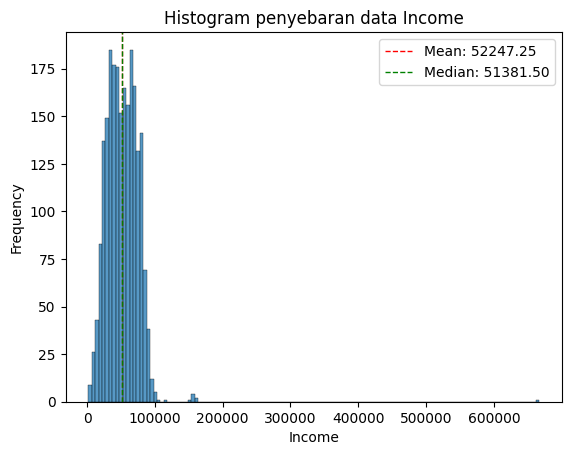

In [42]:
sns.histplot(df_marketing['Income'])
plt.ylabel('Frequency')
plt.xlabel('Income')
plt.title('Histogram penyebaran data Income')

mean_Income = df_marketing['Income'].mean()
plt.axvline(mean_Income, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_Income:.2f}')

median_Income = df_marketing['Income'].median()
plt.axvline(median_Income, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_Income:.2f}')

plt.legend()
plt.show()

dari data diatas nilai modus dan median sudah tepat ditengah

# **Data Distribusi**

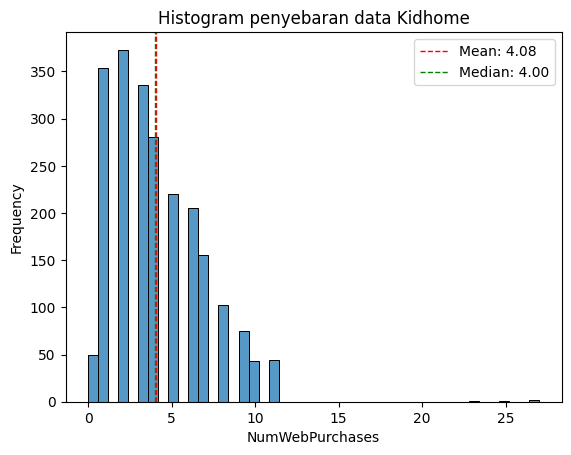

In [43]:
#Histogram melihat apakah penyebaran data NumWebPurchases sudah benar atau belum

sns.histplot(df_marketing['NumWebPurchases'])
plt.ylabel('Frequency')
plt.xlabel('NumWebPurchases')
plt.title('Histogram penyebaran data Kidhome')

mean_NumWebPurchases = df_marketing['NumWebPurchases'].mean()
plt.axvline(mean_NumWebPurchases, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_NumWebPurchases:.2f}')

median_NumWebPurchases = df_marketing['NumWebPurchases'].median()
plt.axvline(median_NumWebPurchases, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_NumWebPurchases:.2f}')

plt.legend()
plt.show()

dari sini terliihat bahwa pembelian via website seakwed ke kanan yang artinya data set tersebut cenderung di positif

Text(0.5, 1.0, 'Boxplot of Customer NumWebPurchases')

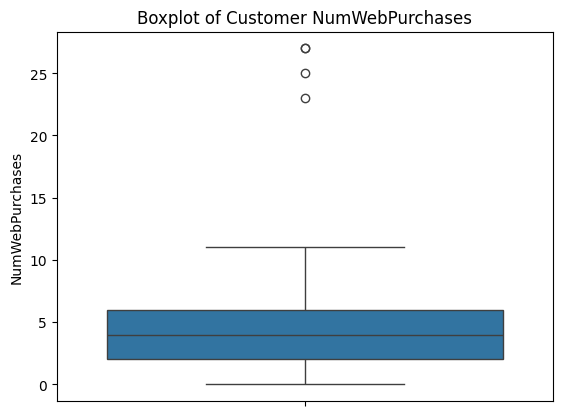

In [44]:
# Boxplot
sns.boxplot(data=df_marketing, y="NumWebPurchases")
plt.ylabel('NumWebPurchases')
plt.title('Boxplot of Customer NumWebPurchases')

In [45]:
q1 = df_marketing['NumWebPurchases'].quantile(0.25)
q3 = df_marketing['NumWebPurchases'].quantile(0.75)
iqr = q3 - q1
iqr

4.0

In [46]:
#menghitung batas bawah dan batas atas
lower_bound1 = q1 - 1.5 * iqr
upper_bound1 = q3 + 1.5 * iqr
lower_bound1, upper_bound1

(-4.0, 12.0)

In [47]:
def_mareketing = df_marketing[(df_marketing['NumWebPurchases'] >= lower_bound) & (df_marketing['NumWebPurchases'] <= upper_bound)]

Text(0.5, 1.0, 'Boxplot of Customer NumWebPurchases')

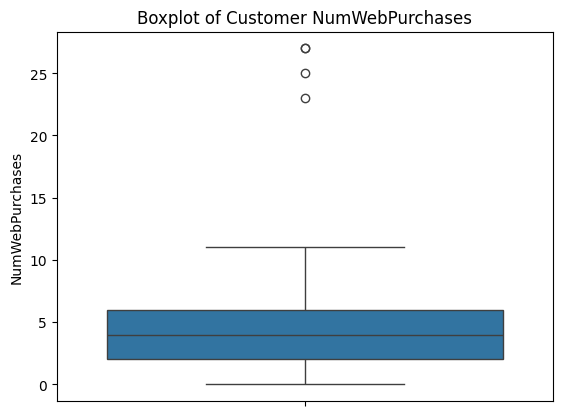

In [48]:
# Boxplot
sns.boxplot(data=df_marketing, y="NumWebPurchases")
plt.ylabel('NumWebPurchases')
plt.title('Boxplot of Customer NumWebPurchases')

In [49]:
df_marketing["NumWebPurchases"].mean()

4.084821428571429

In [50]:
df_marketing["NumWebPurchases"].describe()

,NumWebPurchases
count,2240.000000
mean,4.084821
std,2.778714
min,0.000000
25%,2.000000
50%,4.000000
75%,6.000000
max,27.000000


In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

df_marketing["NumWebPurchases_std"] = sc.fit_transform(df_marketing[["NumWebPurchases"]])

In [52]:
df_marketing.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,NumWebPurchases_std
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1.409304
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,-1.110409
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,1.409304
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,-0.750450
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,0.329427


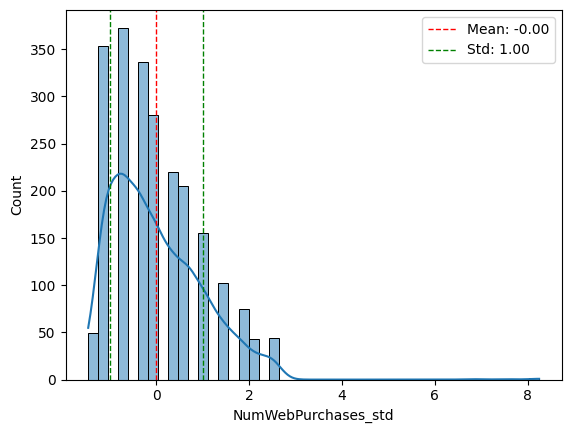

In [53]:
sns.histplot(data=df_marketing, x="NumWebPurchases_std", kde=True)

mean_NumWebPurchases_std = df_marketing['NumWebPurchases_std'].mean()
plt.axvline(mean_NumWebPurchases_std, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_NumWebPurchases_std:.2f}')

std_NumWebPurchases_std = df_marketing['NumWebPurchases_std'].std()
plt.axvline(std_NumWebPurchases_std, color='green', linestyle='dashed', linewidth=1, label=f'Std: {std_NumWebPurchases_std:.2f}')
plt.axvline(-1 * std_NumWebPurchases_std, color='green', linestyle='dashed', linewidth=1)

plt.legend()
plt.show()

In [54]:
# Cek ringkasan statistik dari jumlah pembelian
print(df_marketing['NumWebPurchases'].describe())

# Cek apakah ada transaksi dengan jumlah ekstrem
outlier_pembelian = df_marketing[df_marketing['NumWebPurchases'] > df_marketing['NumWebPurchases'].quantile(0.99)]
print(outlier_pembelian)

# Jika ada kolom total harga dan harga per unit, cek apakah total sesuai
df_marketing['Total_Calculated'] = df_marketing['NumWebPurchases'] * df_marketing['Price_per_Item']
df_marketing['Check_Diff'] = df_marketing['Total_Calculated'] - df_marketing['TotalAmount']
print(df_marketing[df_marketing['Check_Diff'] != 0])  # Menampilkan data yang ada ketidaksesuaian

count    2240.000000
mean        4.084821
std         2.778714
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        27.000000
Name: NumWebPurchases, dtype: float64
         ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
27     5255        1986  Graduation         Single       NaN        1   
1806   6237        1966         PhD         Single    7144.0        0   
1898   4619        1945         PhD         Single  113734.0        0   
1975  10311        1969  Graduation        Married    4428.0        0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
27           0  2013-02-20       19         5          1                3   
1806         2  2013-12-07       92        81          4               33   
1898         0  2014-05-28        9         6          2                3   
1975         1  2013-10-05        0        16          4               12   

      MntFishProducts  MntSweetProducts  M

KeyError: 'Price_per_Item'

In [55]:
print(df_marketing.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'NumWebPurchases_std'],
      dtype='object')


In [56]:
# Mencari transaksi yang jumlahnya lebih tinggi dari kuantil 99% (outlier)
outlier_pembelian = df_marketing[df_marketing['NumWebPurchases'] > df_marketing['NumWebPurchases'].quantile(0.99)]
print(outlier_pembelian)

         ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
27     5255        1986  Graduation         Single       NaN        1   
1806   6237        1966         PhD         Single    7144.0        0   
1898   4619        1945         PhD         Single  113734.0        0   
1975  10311        1969  Graduation        Married    4428.0        0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
27           0  2013-02-20       19         5          1                3   
1806         2  2013-12-07       92        81          4               33   
1898         0  2014-05-28        9         6          2                3   
1975         1  2013-10-05        0        16          4               12   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
27                  3               263           362                  0   
1806                5                 2           291                  0   
1898                

In [57]:
for col in df_marketing.columns:
    if "amount" in col.lower() or "price" in col.lower():
        print(col)

In [58]:
if 'Price_per_Item' in df_marketing.columns and 'TotalAmount' in df_marketing.columns:
    df_marketing['Total_Calculated'] = df_marketing['NumWebPurchases'] * df_marketing['Price_per_Item']
    df_marketing['Check_Diff'] = df_marketing['Total_Calculated'] - df_marketing['TotalAmount']
    print(df_marketing[df_marketing['Check_Diff'] != 0])  # Menampilkan data yang ada ketidaksesuaian
else:
    print("Kolom 'Price_per_Item' atau 'TotalAmount' tidak ditemukan dalam dataset. Analisis dilakukan tanpa kolom ini.")

    # Alternatif analisis hanya berdasarkan jumlah pembelian
    print(df_marketing['NumWebPurchases'].describe())

    # Cek apakah ada transaksi dengan jumlah ekstrem
    outlier_pembelian = df_marketing[df_marketing['NumWebPurchases'] > df_marketing['NumWebPurchases'].quantile(0.99)]
    print(outlier_pembelian)


Kolom 'Price_per_Item' atau 'TotalAmount' tidak ditemukan dalam dataset. Analisis dilakukan tanpa kolom ini.
count    2240.000000
mean        4.084821
std         2.778714
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        27.000000
Name: NumWebPurchases, dtype: float64
         ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
27     5255        1986  Graduation         Single       NaN        1   
1806   6237        1966         PhD         Single    7144.0        0   
1898   4619        1945         PhD         Single  113734.0        0   
1975  10311        1969  Graduation        Married    4428.0        0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
27           0  2013-02-20       19         5          1                3   
1806         2  2013-12-07       92        81          4               33   
1898         0  2014-05-28        9         6          2                3   
1975       

In [59]:
#penegcekan pelanggan dengan id 27  ini bisa jadi menjadi penyebab outliner
df_marketing[df_marketing['NumWebPurchases'] > 20]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,NumWebPurchases_std
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0,8.248526
1806,6237,1966,PhD,Single,7144.0,0,2,2013-12-07,92,81,4,33,5,2,291,0,23,1,1,0,0,0,0,0,0,0,3,11,0,6.808690
1898,4619,1945,PhD,Single,113734.0,0,0,2014-05-28,9,6,2,3,1,262,3,0,27,0,0,1,0,0,0,0,0,0,3,11,0,8.248526
1975,10311,1969,Graduation,Married,4428.0,0,1,2013-10-05,0,16,4,12,2,4,321,0,25,0,0,1,0,0,0,0,0,0,3,11,0,7.528608


In [60]:
#mengelompokan pelanggan berdasarkan jumlah transaksi
df_marketing['Kategori_Pembeli'] = pd.cut(df_marketing['NumWebPurchases'],
                                          bins=[0, 2, 5, 10, 30],
                                          labels=['Jarang', 'Rata-rata', 'Sering', 'Super Aktif'])
print(df_marketing['Kategori_Pembeli'].value_counts())

Kategori_Pembeli
Rata-rata      836
Jarang         727
Sering         580
Super Aktif     48
Name: count, dtype: int64


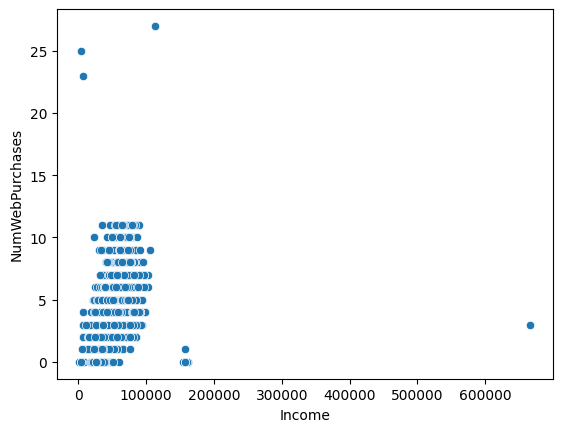

In [61]:
#mengecek apakah pendapatan yang paling tinggi mealakukan transaksi lebih banya
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=df_marketing['Income'], y=df_marketing['NumWebPurchases'])
plt.show()

In [62]:
#hitung korelasi hubungan antara Income dengan transaksi
correlation = df_marketing[['Income', 'NumWebPurchases']].corr()
print(correlation)

                   Income  NumWebPurchases
Income           1.000000         0.387878
NumWebPurchases  0.387878         1.000000


karena nilai korelasi mendekati 0 maka tidak ada korelasi yang kuat

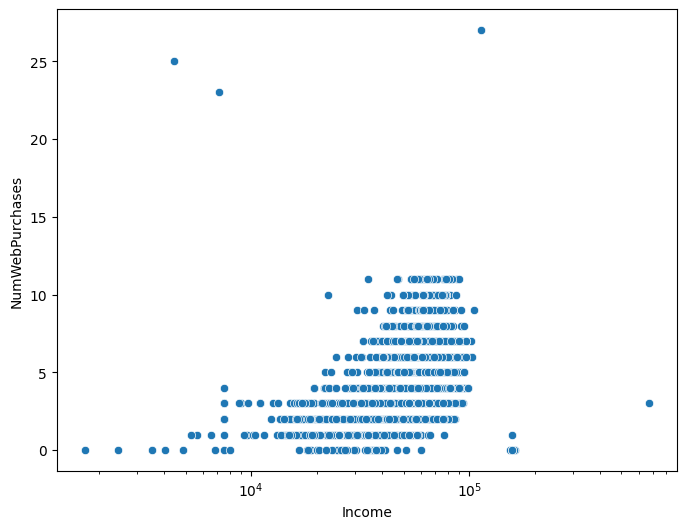

In [63]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_marketing['Income'], y=df_marketing['NumWebPurchases'])
plt.xscale('log')
plt.show()

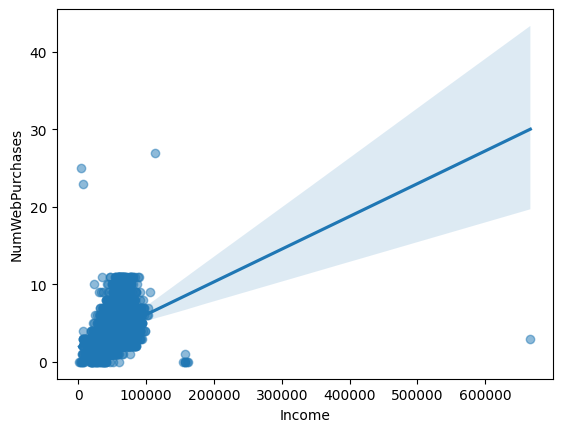

In [64]:
#melihat pola apakah pembelian naik seiring bertambahnya pendapatan
sns.regplot(x=df_marketing['Income'], y=df_marketing['NumWebPurchases'], scatter_kws={'alpha':0.5})
plt.show()


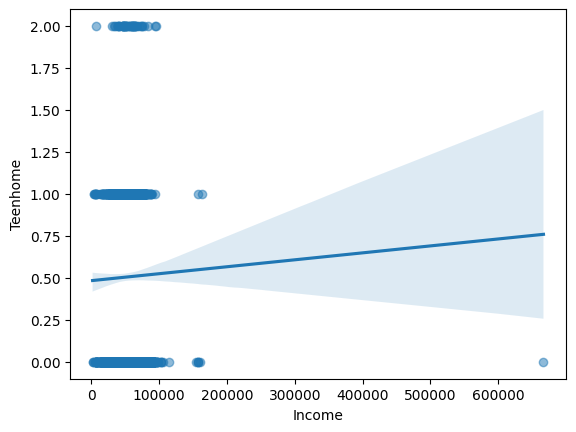

In [108]:
#melihat pola apakah pembelian naik seiring bertambahnya pendapatan
sns.regplot(x=df_marketing['Income'], y=df_marketing['Teenhome'], scatter_kws={'alpha':0.5})
plt.show()

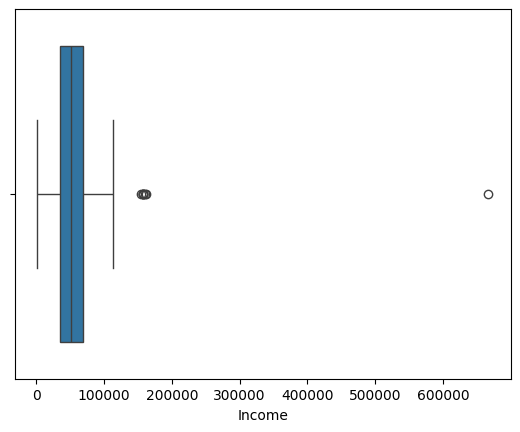

In [65]:
sns.boxplot(x=df_marketing['Income'])
plt.show()

In [66]:
#menghilangkan outliner yang ekstream
q1 = df_marketing['Income'].quantile(0.01)  # Ambil kuantil 1%
q99 = df_marketing['Income'].quantile(0.99) # Ambil kuantil 99%

df_cleaned = df_marketing[(df_marketing['Income'] > q1) & (df_marketing['Income'] < q99)]

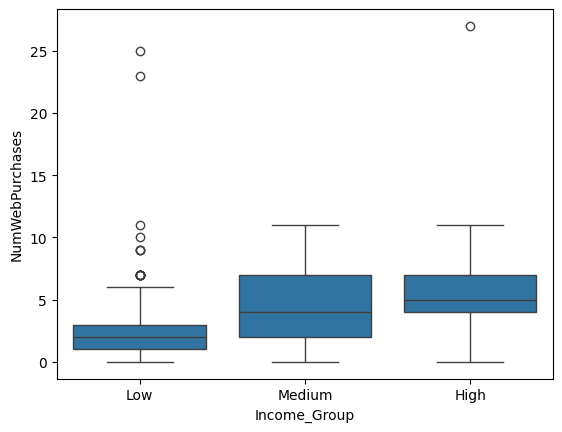

In [67]:
#membagikan kelompok pelanggan dari pendapatan randah ke tinggi
df_marketing['Income_Group'] = pd.qcut(df_marketing['Income'], q=3, labels=['Low', 'Medium', 'High'])
sns.boxplot(x='Income_Group', y='NumWebPurchases', data=df_marketing)
plt.show()


✅ Pendapatan lebih tinggi tidak selalu berarti lebih banyak pembelian online.
✅ Pelanggan berpendapatan rendah memiliki lebih banyak outlier → kemungkinan ada kelompok spesifik yang sangat aktif belanja online meskipun berpenghasilan kecil.
✅ Pelanggan menengah & tinggi memiliki distribusi yang mirip, menunjukkan bahwa faktor lain mungkin lebih berpengaruh dalam keputusan belanja online (misalnya kebiasaan belanja atau preferensi produk).

<Axes: xlabel='NumWebPurchases'>

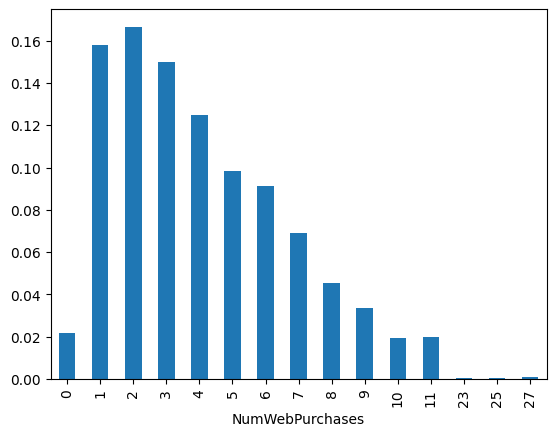

In [70]:
customer_NumWebPurchases = df_marketing["NumWebPurchases"].value_counts(normalize=True)
customer_NumWebPurchases.sort_index(ascending=True).plot(kind="bar")

In [69]:
df_marketing["Teenhome"].unique()

array([0, 1, 2])

In [71]:
print(df_marketing.dtypes)
print(df_marketing.isnull().sum())

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [72]:
NumWebPurchases_churn0 = df_marketing[df_marketing["Teenhome"] == 0]["NumWebPurchases"].value_counts(normalize=True) #ingin melihat pemebelian yang memiliki anak remaja 0

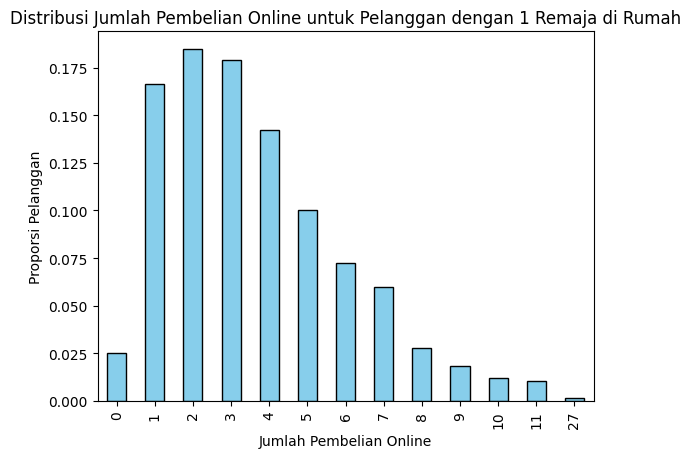

In [73]:
NumWebPurchases_churn0.sort_index(ascending=True).plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Distribusi Jumlah Pembelian Online untuk Pelanggan dengan 1 Remaja di Rumah")
plt.xlabel("Jumlah Pembelian Online")
plt.ylabel("Proporsi Pelanggan")
plt.show()

In [74]:
NumWebPurchases_churn1 = df_marketing[df_marketing["Teenhome"] == 1]["NumWebPurchases"].value_counts(normalize=True) #ingin melihat pemebelian yang memiliki anak remaja 1

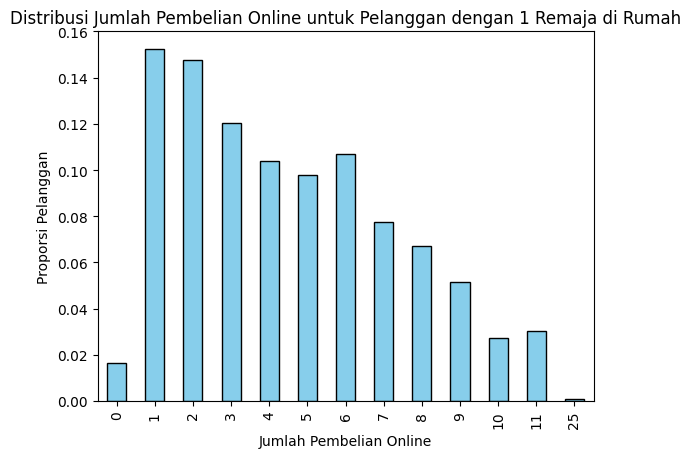

In [75]:
NumWebPurchases_churn1.sort_index(ascending=True).plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Distribusi Jumlah Pembelian Online untuk Pelanggan dengan 1 Remaja di Rumah")
plt.xlabel("Jumlah Pembelian Online")
plt.ylabel("Proporsi Pelanggan")
plt.show()

In [76]:
NumWebPurchases_churn2 = df_marketing[df_marketing["Teenhome"] == 2]["NumWebPurchases"].value_counts(normalize=True) #ingin melihat pemebelian yang memiliki anak remaja 1

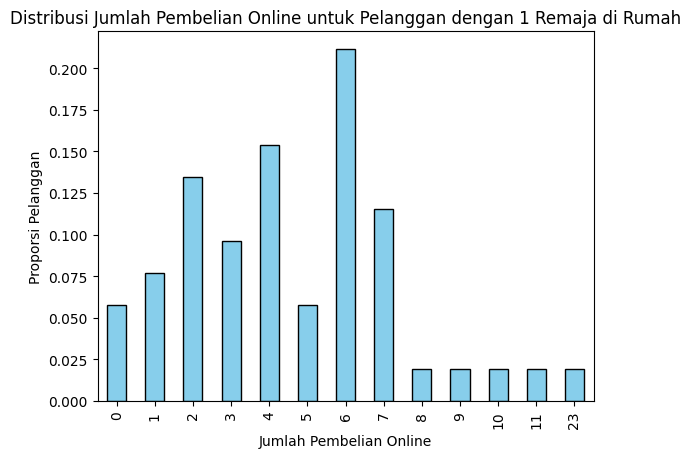

In [77]:
NumWebPurchases_churn2.sort_index(ascending=True).plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Distribusi Jumlah Pembelian Online untuk Pelanggan dengan 1 Remaja di Rumah")
plt.xlabel("Jumlah Pembelian Online")
plt.ylabel("Proporsi Pelanggan")
plt.show()

In [78]:
# Filter pelanggan dengan total anak 0-2 tahun
df_filtered = df_marketing[(df_marketing["Kidhome"] + df_marketing["Teenhome"]) <= 2]

# Hitung rata-rata pembelian via website
average_web_purchases = df_filtered["NumWebPurchases"].mean()

# Tampilkan hasil
print(f"Rata-rata pembelian via website pelanggan dengan anak 0-2 tahun: {average_web_purchases:.2f}")


Rata-rata pembelian via website pelanggan dengan anak 0-2 tahun: 4.11


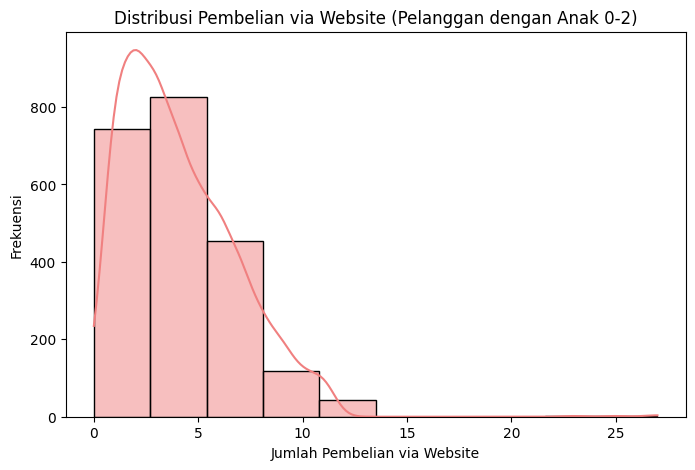

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df_filtered["NumWebPurchases"], bins=10, kde=True, color="lightcoral")

# Tambahkan label
plt.title("Distribusi Pembelian via Website (Pelanggan dengan Anak 0-2)")
plt.xlabel("Jumlah Pembelian via Website")
plt.ylabel("Frekuensi")
plt.show()

dari data diatas terlihat pemebelian pelanggan yang memiliki anak 0 lebih tinggi dibandingkan dengan pelanggan yang memiliki anak 1-2

# ***Z_Score***

In [80]:
rata_rata_Teenhome = df_marketing['Teenhome'].mean()
rata_rata_Teenhome

0.50625

In [81]:
std_Teenhome = df_marketing['Teenhome'].std()
std_Teenhome

0.5445382307698755

In [82]:
df_marketing["z_score_Teenhome"] = (df_marketing["Teenhome"] - rata_rata_Teenhome) / std_Teenhome

In [83]:
df_marketing["z_score_Teenhome_flag"] = np.where(abs(df_marketing["z_score_Teenhome"]) > 3, "Outlier", "Non-Outlier")
outliers = df_marketing[df_marketing["z_score_Teenhome_flag"] == "Outlier"]
print(outliers)

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response, NumWebPurchases_std, Kategori_Pembeli, Income_Group, z_score_Teenhome, z_score_Teenhome_flag]
Index: []


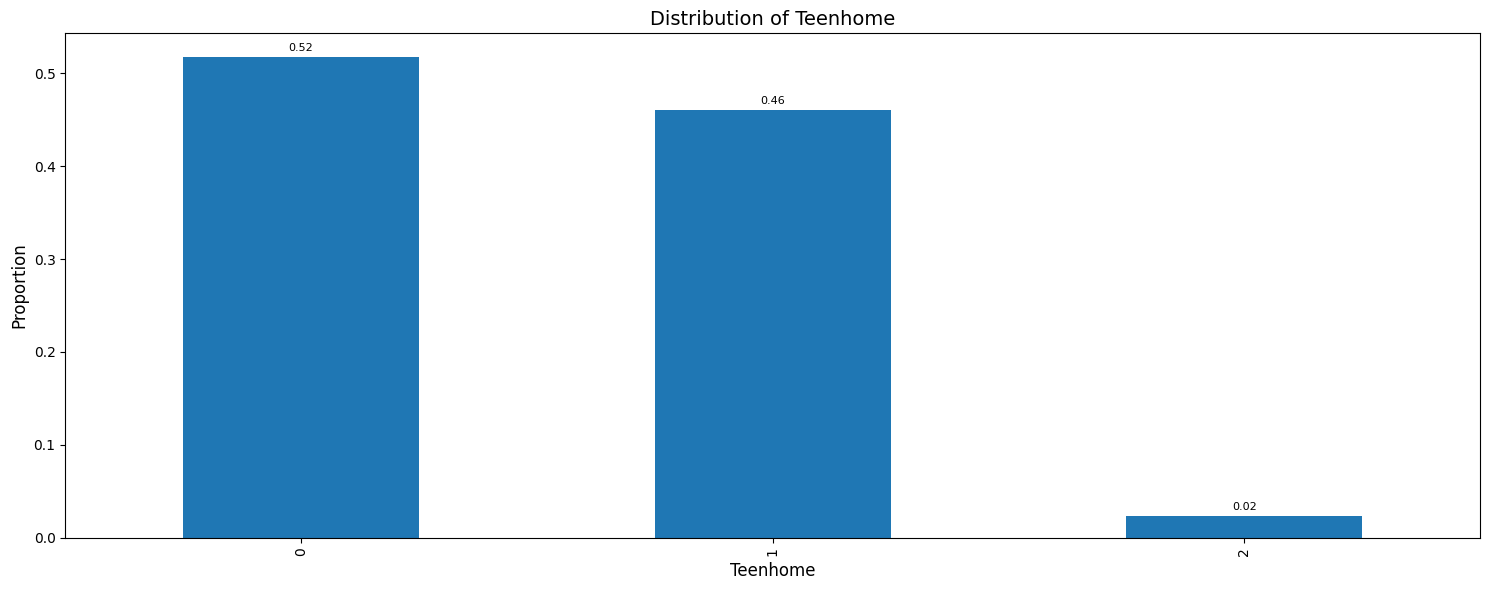

In [84]:
customer_age = df_marketing["Teenhome"].value_counts(normalize=True).sort_index()
ax = customer_age.plot(kind="bar", figsize=(15, 6))  # Menentukan ukuran gambar
ax.set_xlabel("Teenhome", fontsize=12)  # Mengatur ukuran font label x
ax.set_ylabel("Proportion", fontsize=12)  # Memberi label y-axis dan mengatur ukuran font
ax.tick_params(axis='both', which='major', labelsize=10) # Mengatur ukuran font tick
# Tambahkan angka di atas setiap bar dengan format yang lebih baik
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 3),  # Menggeser teks sedikit ke atas
                textcoords="offset points",
                ha='center', va='bottom', fontsize=8) # Mengatur ukuran font
plt.title("Distribution of Teenhome", fontsize=14) # Memberi judul dan mengatur ukuran font
plt.tight_layout()  # Menyesuaikan tata letak agar label tidak tumpang tindih
plt.show()

# ***T-Test***

Apakah pembelian produk via website dipengaruhi oleh jumlah anak?

H0 = Tidak ada perbedaan Pembelian produk Via Website oleh pelanggan yang memmiliki anak Remaja  0

H1 = ada perbedaan Pembelian Produk via Website oleh pelanggan yang memmiliki anak Remaja  0

In [85]:
np.mean(def_mareketing["NumWebPurchases"])

4.084821428571429

In [86]:
np.mean(df_marketing["Teenhome"])

0.50625

In [88]:
np.mean(np.mean(df_marketing["Teenhome"]-df_marketing["NumWebPurchases"]))

-3.5785714285714287

In [89]:
stats.ttest_ind(df_marketing["Teenhome"], df_marketing["NumWebPurchases"])

TtestResult(statistic=-59.81454297501842, pvalue=0.0, df=4478.0)

In [90]:

t_stat, p_value = stats.ttest_ind(df_marketing["Teenhome"], df_marketing["NumWebPurchases"])
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")


T-Statistic: -59.81454297501842, P-Value: 0.0


In [92]:
#Keputusan
alpha = 0.05
if p_value <= alpha:
    print("Tolak H0")
else:
    print("Gagal menolak H0")


Tolak H0


 ada perbedaan Pembelian Produk via Website oleh pelanggan yang memmiliki anak Remaja  0

In [94]:
from scipy.stats import ttest_ind
group1 = df_marketing[df_marketing["Teenhome"] == 1]["NumWebPurchases"]
group0 = df_marketing[df_marketing["Teenhome"] == 0]["NumWebPurchases"]

# Lakukan t-test
t_stat, p_val = ttest_ind(group1, group0, equal_var=False)  # Gunakan Welch’s t-test

t_stat, p_value = stats.ttest_ind(df_marketing["Teenhome"], df_marketing["NumWebPurchases"])
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.10e}")

T-Statistic: -59.81454297501842, P-Value: 0.0
T-statistic: -59.8145
P-value: 2.8524646362e-13


In [95]:
# Keputusan
alpha = 0.05
if p_value <= alpha:
    print("Tolak H0")
else:
    print("Gagal menolak H0")

Tolak H0


Hasil uji t menunjukkan bahwa ada perbedaan signifikan dalam pembelian via website berdasarkan jumlah anak remaja.

# ***Chi Square Test***
Tujuan : Menguji hubungan antara dua variabel kategori

In [96]:
df_marketing[['NumWebPurchases','Teenhome']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   NumWebPurchases  2240 non-null   int64
 1   Teenhome         2240 non-null   int64
dtypes: int64(2)
memory usage: 35.1 KB


In [97]:
encode_table = pd.crosstab(df_marketing['NumWebPurchases'], df_marketing['Teenhome'])
encode_table

Teenhome,0,1,2
NumWebPurchases,,,
0,29,17,3
1,193,157,4
2,214,152,7
3,207,124,5
4,165,107,8
5,116,101,3
6,84,110,11
7,69,80,6
8,32,69,1


Hipotesis:

H0 : Tidak ada hubungan antara penjualan via webiste dengan junmlah anak remaja

H1 : Ada hubungan antara penjualan via website dengan jumlah anak remaja

In [98]:
from scipy.stats import chi2_contingency

# Chi-Square Test
chi2, p, dof, expected = chi2_contingency(encode_table)
print(f"Chi-Square: {chi2}, P-Value: {p}")

Chi-Square: 153.63413188312325, P-Value: 2.7203703754808193e-19


In [99]:
# Keputusan
alpha = 0.05
if p <= alpha:
    print("Tolak H0")
else:
    print("Gagal menolak H0")


Tolak H0


**Kesimpulan**

Ada hubungan yang cukup besar antara penjualan via website dengan jumlah anak remaja ini dikarenakan
p-value(2.72) >= alpha(0.05)

# ***Anova***

Tujuan : Membandingkan rata-rata lebih dari dua kelompok

In [100]:
from scipy.stats import f_oneway

# Buat grup berdasarkan jumlah anak remaja
group_0 = df_marketing[df_marketing["Teenhome"] == 0]["NumWebPurchases"]
group_1 = df_marketing[df_marketing["Teenhome"] == 1]["NumWebPurchases"]
group_2 = df_marketing[df_marketing["Teenhome"] == 2]["NumWebPurchases"]


# Uji ANOVA
f_stat, p_val = f_oneway(group_0, group_1, group_2)
print(f"F-Statistic: {f_stat}, P-Value: {p_value}")

# Keputusan
alpha = 0.05
if p_value <= alpha:
    print("Tolak H0")
else:
    print("Gagal menolak H0")

F-Statistic: 28.738553016849426, P-Value: 0.0
Tolak H0


kitika menolak H0 (maka Terdapat perbedaan pembelian via website dengan jumlah anak remaja yang dimiliki pelanggan mulai dari 0-2)

# ***Regresi Analisis***
Tujuan : Menguji hubungan antara variabel independen dan variabel dependen

In [101]:
import statsmodels.api as sm

# Contoh data
X = df_marketing['Teenhome']
Y = df_marketing['NumWebPurchases']

Dalam regresi linear, kita sering menambahkan kolom konstanta (bias) ke matriks variabel independen X. Fungsi sm.add_constant(X) menambahkan kolom konstanta ke X, yang diperlukan untuk menghitung intercept (titik potong) dalam model regresi linear.

In [102]:
# Tambahkan konstanta
X = sm.add_constant(X)
X

,const,Teenhome
0,1.0,0
1,1.0,1
2,1.0,0
3,1.0,0
4,1.0,0
...,...,...
2235,1.0,1
2236,1.0,1
2237,1.0,0
2238,1.0,1


sm.OLS(Y, X) membuat model Ordinary Least Squares (OLS) menggunakan variabel dependen Y dan variabel independen X.
.fit() menyesuaikan model OLS ke data, menghitung koefisien regresi yang meminimalkan jumlah kuadrat selisih antara nilai yang diamati dan nilai yang diprediksi.

In [103]:
# Regresi linear
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

In [104]:
# Summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        NumWebPurchases   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     55.46
Date:                Sun, 09 Mar 2025   Prob (F-statistic):           1.36e-13
Time:                        07:52:58   Log-Likelihood:                -5439.8
No. Observations:                2240   AIC:                         1.088e+04
Df Residuals:                    2238   BIC:                         1.089e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6831      0.079     46.495      0.0

In [105]:
# Menampilkan prediksi
print(predictions)

0       3.683114
1       4.476611
2       3.683114
3       3.683114
4       3.683114
          ...   
2235    4.476611
2236    4.476611
2237    3.683114
2238    4.476611
2239    4.476611
Length: 2240, dtype: float64


In [106]:
a =   4.476611
b =  3.683114
print(a-b)

0.7934969999999999


# ***Kesimpulan***
Variabel Teenhome berpengaruh signifikan terhadap pembelian online (p-value = 0.000).
Tapi, model hanya menjelaskan 2.4% variabilitas data (R² = 0.024) → Model ini belum cukup kuat.
Perlu menambahkan variabel lain agar model lebih akurat (misalnya, pendapatan, kebiasaan belanja, dll.).